## Evaluación Módulo 3 Transformando Datos

### Fase 1: Exploración y Limpieza
1. Exploración Inicial:
Realiza una exploración inicial de los datos para identificar posibles problemas, como valores
nulos, atípicos o datos faltantes en las columnas relevantes.
Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la
presencia de valores nulos y estadísticas básicas de las columnas involucradas.
Une los dos conjuntos de datos de la forma más eficiente.
2. Limpieza de Datos:
Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos
estén completos.
Verifica la consistencia y corrección de los datos para asegurarte de que los datos se
presenten de forma coherente.
Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de
datos) para garantizar la adecuación de los datos para el análisis estadístico.

### Fase 2: Visualización
Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes
gráficas usando la mejor gráfica que consideres:
1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
evaluacion-final.md 2024-08-31
3 / 4
2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?
3. ¿Cuál es la distribución de los clientes por provincia o estado?
4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
6. ¿Cómo se distribuyen los clientes según su estado civil y género?

### BONUS Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo
Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias
significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los
pasos que deberas seguir son:
1. Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes:
'Flights Booked' y 'Education'.
2. Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas
básicas (como el promedio, la desviación estandar) del número de vuelos reservados para cada
grupo.
3. Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia

# Contenidos

## Fase 1: Exploración y limpieza

### Fase 1.1: Exploración de los Datos

1.1.1 Explorando datos Flight Activity
1.1.2 Explorando datos Loyalty History

### Fase 1.2: Limpieza de los DataFrames

1.2.1 Limpieza DataFrame Flight Activity

1.2.2 Limpieza DataFrame Customer Loyalty

### Fase 1.3: Unión de los DataFrames

### Fase 1.4: Limpieza del DataFrame

## Fase 2: Visualización

## Fase 3. Evaluación de Diferencias

### 3.1 Preparación de Datos

### 3.2 Análisis Descriptivo

### 3.3 Prueba estadística




## Fase 1: Exploración y limpieza

### Fase 1.1: Exploración de los Datos

Hacemos una exploración inicial de los 2 archivos csv proporcionados.

1.1.1 Explorando datos Flight Activity

In [130]:
# Importamos las librerías que necesitaremos para el ejercicio

# Librerías de tratamiento de datos

import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos de la visualización de todas las columnas de los DataFrames
pd.set_option('display.max_columns', None)

In [133]:
# Cargamos los csv

df_flight_activity = pd.read_csv('Data/Customer Flight Activity.csv')

# Comprobamos que los datos se han cargado bien

df_flight_activity.head(3)

# Comprobación: Comprobar si los puntos acumulados son por vuelos realizados o por vuelos reservados (parece que sería por 
# vuelos realizados dado que menciona la distancia volada).

# No queda claro en el enunciado si los vuelos acompañados son del mes o el total. A preguntar al interesado.

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0


In [191]:
df_loyalty_customer = pd.read_csv('Data/Customer Loyalty History.csv')
df_loyalty_customer.head(3)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0


In [135]:
# Exploración inicial
# Comenzamos explorando el DataFrame de actividad de vuelo

print(df_flight_activity.shape)
print(f'Flight Activity DataFrame consists of {df_flight_activity.shape[0]} rows')
print(f'Flight Activity DataFrame consists of {df_flight_activity.shape[1]} columns')


(405624, 10)
Flight Activity DataFrame consists of 405624 rows
Flight Activity DataFrame consists of 10 columns


In [136]:
# Visualizamos 3 resultados al azar

df_flight_activity.sample(3)

# Hay registros nulos por completo salvo por el mes, año y número de fidelización. Son clientes que no han volado bajo el 
# programa de fidelización. Es información relevante pues nos informa de cientes inscritos en el programa que no vuelan.

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
141122,417584,2017,9,6,2,8,2544,254.0,0,0
7448,496668,2017,1,0,0,0,0,0.0,0,0
61541,677153,2017,4,0,0,0,0,0.0,0,0


In [137]:
df_flight_activity.info()

# El conjunto de datos de actividad de vuelo no contiene valores nulos.

# Todos las variables del DataFrame son de tipo numérico.

# Comprobación: Evaluar si cambiar tipo de número. No parece tener mucho sentido que los puntos canjeados sean números enteros 
# cuando los puntos acumulados son de tipo decimal. 

# El resto de tipo de datos parecen coherente con el atributo asociado.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [138]:
df_flight_activity.describe().T

# Con count volvemos a verificar que todos los registros de todas las columnas tienen valores no nulos.

# Todos los valores mínimos y máximos son coherentes con las variables asociadas. 

# Los datos que tenemos son de los años 2017 y 2018 y son de todos los meses del año.

# Las desviaciones estándar para el número de vuelos reservados, vuelos con acompañante, vuelos totales, distancia, puntos 
# acumulados, puntos canjeados, y coste en dólares de los puntos canjeados es muy alta pues en todos los casos es mayor o mucho
# mayor que la media. Por lo tanto son variables con una dispersión muy alta o altísima o hay outliers que distorsionan las 
# desviación típica.

# Comprobar la presencia de outliers para las variables: Flights Booked, Flights with Companions, Total Flights, Distance, 
# Points Accumulated, Points Redeemed y Dollar Cost Points Redeemed.

# Dado que los primeros 3 cuartiles para los puntos canjeados y para su valor asociado en dólares son 0, esto significa que 
# solo un porcentaje de clientes muy bajo canjea sus puntos. Lo mismo pasa con los vuelos con acompañante: muy pocas personas 
# en relación al total hacen vuelos acompañadas.

# El 25% de los registros de distancia tienen valores nulos. Esto significa que al menos el 25% de los clientes no ha volado
# nunca desde que tiene el programa de fidelización. 

# ...
# Falta análisis de cuartiles de Total Flights, Distance y Points Accumulated

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [139]:
# Listamos los valores únicos contenidos en las columnas con un número limitado de datos para ver si hay valores extraños:
for column in df_flight_activity.columns[1:-4]:
    print(f'Column {column} contains the values: {df_flight_activity[column].unique()} ')
    print('------------------------------------------------------------------------')

# Los datos que tenemos son de los años 2017 y 2018 y de todos los meses del año, como ya observamos cuando usamos el método 
# describe().    

# No hay valores extraños en estas variables.

Column Year contains the values: [2017 2018] 
------------------------------------------------------------------------
Column Month contains the values: [ 1  9  2  3 11  4  5  7  6  8 10 12] 
------------------------------------------------------------------------
Column Flights Booked contains the values: [ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21] 
------------------------------------------------------------------------
Column Flights with Companions contains the values: [ 0  4  7  1  6  3  5  2 10  8  9 11] 
------------------------------------------------------------------------
Column Total Flights contains the values: [ 3 14  6  0 15 11 12 10  8  9  7  5 16  2  1 17 13 22  4 19 18 21 26 20
 23 25 27 24 28 30 29 31 32] 
------------------------------------------------------------------------


In [140]:
# Comprobamos si el DataFrame contiene registros duplicados

df_flight_activity[df_flight_activity.duplicated()].head(2)

# Fase de limpieza: limpiar duplicados df_flight_activity


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0


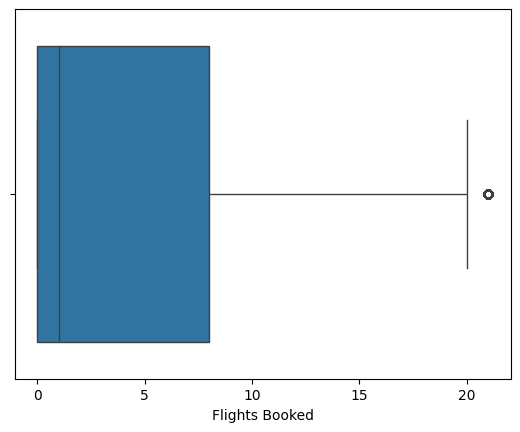

In [141]:
# Comprobación de ouliers. Comenzamos con la variable vuelos reservados
# Hacemos un boxplot
sns.boxplot(x=df_flight_activity['Flights Booked']);

# Tenemos valores fuera del bigote así que tenemos outliers. La mediana está en 1 lo que muestra la alta concentración de los
# datos para números bajos

In [142]:
df_flight_activity['Total Flights'].max()

# El máximo valor de vuelos totales es 32 y el límite para los outliers es 20.

32

In [143]:
# Calculamos qué porcentaje de datos están por encima de 20

print(f'{round(df_flight_activity[df_flight_activity['Total Flights']>20]['Flights Booked'].count()/df_flight_activity.shape[0]*100, 2)} %')


2.54 %


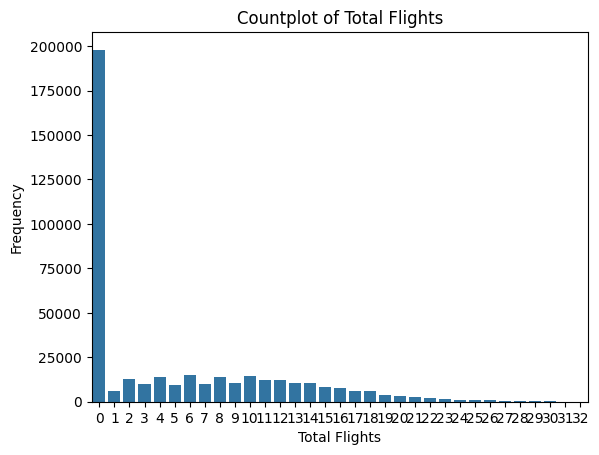

In [144]:
# Hacemos un diagrama de barras para ver cómo se distribuyen los valores

sns.countplot(df_flight_activity, x='Total Flights')
plt.title ('Countplot of Total Flights')
plt.ylabel('Frequency');

# Alrededor del 50% de los clientes no han hecho ningún vuelo

In [145]:
# Vamos a hacer un diagrama de barras exluyendo el valor 0 dado que el 0 concentra cerca del 50% de los datos para ver cómo 
# se distribuye el resto de datos.
# Para ello filtramos los datos de la columna para excluir el 0.

df_wo0 = df_flight_activity[df_flight_activity['Total Flights']>0]
print(f'The number of rows excluding those with a null value is {df_wo0.shape[0]}')


The number of rows excluding those with a null value is 207632


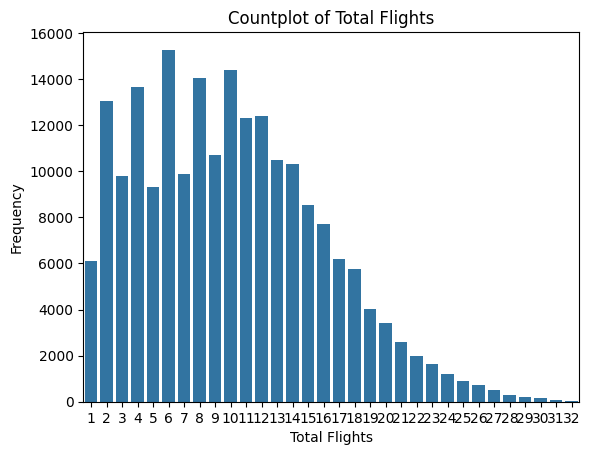

In [146]:
# Volvemos a hacer el diagrama de barras excluyendo el valor 0
sns.countplot(df_wo0, x='Total Flights')

plt.title ('Countplot of Total Flights')
plt.ylabel('Frequency');

# Comprobación: El comportamiento que muestran los datos en principio es lógico. El número de vuelos va descendiendo según 
# aumenta la cantidad de vuelos. Dado que es el número de vuelos totales del cliente lo dejamos para estudiarlo con el DataFrame
# que incluya los datos del cliente para ver si los outliers guardan relación con los años que llevan los clientes en el programa de 
# fidelización.

In [147]:
# Obtenemos cuántos clientes tienen registros en Flight Activity antes de hacer la limpieza

print(f'Number or rows in Flight Activity DataFrame are {df_flight_activity['Loyalty Number'].unique().size}')


Number or rows in Flight Activity DataFrame are 16737


In [ ]:
## Acciones faltantes:

# Comprobar si los puntos acumulados son por vuelos realizados o por vuelos reservados (parece que sería por vuelos realizados 
# dado que menciona la distancia volada).

# Comprobación:  Evaluar si cambiar tipo de número para los puntos canjeados. No parece tener mucho sentido que los puntos 
# canjeados sean números enteros cuando los puntos acumulados son de tipo decimal. 

# Comprobaciones lógicas:
# Si Total Flights = 0 => Distance = 0
# Flights with Companions <= Total Flights
# Total Flights >= Flights Booked
# Points Redeemed <= Points Accumulated

# Comprobar la presencia de outliers para las variables: Flights with Companions, Total Flights, Distance, Points Accumulated, 
# Points Redeemed y Dollar Cost Points Redeemed.

# Buscar la relación entre Points Redeemed y Dollar Cost Points Redeemed



1.1.2 Explorando datos Loyalty History

In [148]:
# Exploramos el DataFrame con los datos de los clientes del programa de fidelización.

print(df_loyalty_customer.shape)
print(f'Loyalty Customer DataFrame consists of {df_loyalty_customer.shape[0]} rows')
print(f'Loyalty Customer DataFrame consists of {df_loyalty_customer.shape[1]} columns')


(16737, 16)
Loyalty Customer DataFrame consists of 16737 rows
Loyalty Customer DataFrame consists of 16 columns


In [149]:
# Obtenemos los 3 primeros registros del DataFrame
df_loyalty_customer.head(3)

# El DataFrame contiene variables numéricas y categóricas.

# Limpieza: El DataFrame contiene valores nulos al menos en las columnas: Salary, Enrollment Year, Enrollment Month.


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0


In [20]:
# Obtenemos 3 registros al azar
df_loyalty_customer.sample(3)

# Comprobación: El salario tiene al menos un decimal. No parece tener mucho sentido

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
14039,338808,Canada,Ontario,Toronto,M2M 7K8,Female,Bachelor,96116.0,Divorced,Star,5934.74,Standard,2017,12,NaN,NaN
15114,614063,Canada,Quebec,Montreal,H2Y 4R4,Female,College,NaN,Single,Star,8485.39,Standard,2016,3,NaN,NaN
15031,547802,Canada,Quebec,Montreal,H2T 2J6,Male,Bachelor,79007.0,Married,Star,8317.30,Standard,2012,7,NaN,NaN


In [150]:
df_loyalty_customer.info()

# Limpieza: las columnas Salary, Cancellation Year y Cancellation Month contienen nulos.

# Limpieza: los años y meses de cancelación son de tipo decimal. Ponerlos de tipo entero

# El resto de tipo de datos es correcto.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [151]:
df_loyalty_customer.describe().T

# Limpieza: el salario mínimo es negativo.

# Los años de inscripción en el programa están entre 2012 y 2018.

# Las cancelaciones comienzan en el año 2013.

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [152]:
# Obtenemos los principales estadísticos de las columnas categóricas.
df_loyalty_customer.describe(include='object').T

# Todos los clientes son canadienses, de 11 provincias distintas aunque Canadá solo tiene 10 provincias.

# Los valores que más se repiten son los de la columna 'top' y se repiten el número de veces que aparece en la columna 'freq'

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [153]:
# Calculamos los valores únicos para las columnas tipo objeto:

# Primero creamos un objeto con los nombres de las columnas tipo objeto:

object_columns= df_loyalty_customer.columns[df_loyalty_customer.dtypes == object]
print(f'Type object columns are: {object_columns}')
print('------------------------------------------------------------------------------------------------------')

for atribute in object_columns:
    print(f'Unique values in column {atribute} are')
    print(f'{df_loyalty_customer[atribute].unique()}')
    print('------------------------------------------------------------------------------------------------------')

# Hay 11 provincias cuando en Canadá hay solo 10. Yukon es uno de los 3 territorios, no una provincia como tal.

# Comprobar que los códigos postales son del tipo correcto.

# Limpieza: Ciudades: Hull es un distrito de la ciudad de Gatineau. Tremblant tampoco es una ciudad de Canadá.

# El resto de atributos parecen correctos.


Type object columns are: Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Marital Status', 'Loyalty Card', 'Enrollment Type'],
      dtype='object')
------------------------------------------------------------------------------------------------------
Unique values in column Country are
['Canada']
------------------------------------------------------------------------------------------------------
Unique values in column Province are
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
------------------------------------------------------------------------------------------------------
Unique values in column City are
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifa

In [154]:
# Comprobación visual de los códigos postales

df_loyalty_customer['Postal Code'].unique()

# Todos los códigos postales siguen el patrón correcto.

# Comprobar con regex si son del tipo correcto.


array(['M2Z 4K1', 'T3G 6Y6', 'V6E 3D9', 'P1W 1K4', 'J8Y 3Z5', 'Y2K 6R0',
       'P5S 6R4', 'K8V 4B2', 'H2Y 2W2', 'M8Y 4K8', 'U5I 4F1', 'G1B 3L5',
       'H4G 3T4', 'M2M 7K8', 'M2M 6J7', 'E3B 2H2', 'M1R 4K3', 'T9G 1W3',
       'H2Y 4R4', 'V5R 1W3', 'P1L 8X8', 'K1F 2R2', 'H5Y 2S9', 'V1E 4R6',
       'H2T 2J6', 'T3E 2V9', 'H2T 9K8', 'K8T 5M5', 'V6T 1Y8', 'P2T 6G3',
       'T9O 2W2', 'V6E 3Z3', 'R6Y 4T5', 'M5V 1G5', 'V6V 8Z3', 'B3J 9S2',
       'M5B 3E4', 'R2C 0M5', 'S6J 3G0', 'M2P 4F6', 'P1J 8T7', 'V09 2E9',
       'A1C 6H9', 'V10 6T5', 'B3C 2M8', 'M9K 2P4', 'T4V 1D4', 'R3R 3T4',
       'S1J 3C5', 'E1A 2A7', 'K1G 4Z0', 'H3T 8L4', 'C1A 6E8', 'H3J 5I6',
       'M3R 4K8'], dtype=object)

In [155]:
# Comprobamos que los números de fidelización del DataFrame de clientes son únicos dado que se trata de un identificador: el 
# número de valores únicos del # número de fidelización deberá ser igual al número de registros del DataFrame.

print(f'Loyalty Numbers in Loyalty Customer DataFrame are unique: {df_loyalty_customer.shape[0] == df_loyalty_customer['Loyalty Number'].unique().size}')


Loyalty Numbers in Loyalty Customer DataFrame are unique: True


In [156]:
# Verificamos los valores únicos de columnas tipo numérico con un conjunto discreto de datos

discret_nr_columns= df_loyalty_customer.iloc[:, 12:16:].columns

for column in discret_nr_columns:
    print(f'Unique values for column {column} are {df_loyalty_customer[column].unique()}')
    print('-----------------------------------------------------')

# Comprobación: Hay clientes que empezaron a formar parte del programa en 2017 y 2018. Buscar sus  registros en las 
# tablas de actividad a ver si esos son los que tienen todo cero y los podemos eliminar.

# Además de esto, no hay nada remarcable salvo por los nulos que ya teníamos localizados   

Unique values for column Enrollment Year are [2016 2014 2013 2012 2015 2018 2017]
-----------------------------------------------------
Unique values for column Enrollment Month are [ 2  3  7 10  5  6 12  1 11  8  4  9]
-----------------------------------------------------
Unique values for column Cancellation Year are [  nan 2018. 2015. 2017. 2014. 2016. 2013.]
-----------------------------------------------------
Unique values for column Cancellation Month are [nan  1. 12.  4.  2.  7. 11.  5.  6. 10.  8.  9.  3.]
-----------------------------------------------------


In [157]:
# Comprobamos si contiene duplicados
df_loyalty_customer[df_loyalty_customer.duplicated()]

# El DataFrame no tiene registros duplicados.

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month


In [158]:
# Calculamos los nulos que tenemos en cada columna

df_loyalty_customer.isnull().sum()

# Limpieza: a los salarios nulos les tendremos que imputar un valor adecuado.

# Limpieza: las columnas Cancellation Year y Cancellation Month contienen muchos nulos, lo que significa que la mayoría de los 
# clientes continuan en el programa de fidelización. Imputarles 'Not Applicable'.


Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [ ]:
# Pendientes: 

# Comprobar que tiene sentido que el salario tenga un decimal.

# Comprobaciones lógicas: la fecha de cancelación, si la hay, ha de ser posterior a la fecha en que se apuntaron al programa.

# Extra: comprobar con regex que los códigos postales con correctos. 


### Fase 1.2: Limpieza de los DataFrames

A falta de contexto, limpio los DataFrames por separado pues hay cuestiones que dependen solo de la información en ellos contenida. Además, esto nos permite utilizar los DataFrames por separado en un momento dado. 

Más tarde, realizaré una limpieza de los DataFrames unidos.

1.2.1 Limpieza DataFrame Flight Activity

In [160]:
# Como calculamos previamente el DataFrame contiene duplicados
display(df_flight_activity[df_flight_activity.duplicated()].head(2))

# Calculamos cuantos duplicados tenemos

number_of_duplicates = df_flight_activity[df_flight_activity.duplicated()].shape[0]

print(f'Flight Activity DataFrame contains {number_of_duplicates} duplicated rows')


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0


Flight Activity DataFrame contains 1864 duplicated rows


In [161]:
# Calculamos el máximo número de filas que puede tener el DataFrame de flight activity: el número de registros no puede superar 
# al número de clientes multiplicado por 2, que son los años que figuran en el registro flight activity, y por 12 meses que tiene
# cada año.

flight_act_max_rows = df_loyalty_customer.shape[0] *12 *2
print(f'Maximum number of rows in Flight Activity DataFrame is {flight_act_max_rows}')


Maximum number of rows in Flight Activity DataFrame is 401688


In [162]:
# Comprobamos que el número de registros del DataFrame Flight Activity no excede el valor máximo:

flight_act_rows = df_flight_activity.shape[0]

print(f'Flight Activity DataFrame does not exceed the maximum number or rows: {flight_act_rows <= flight_act_max_rows}' )

print(f'There are at least { flight_act_rows- flight_act_max_rows - number_of_duplicates} excess rows')

# Ni siquiera quitando las filas duplicadas del DataFrame el número de filas es correcto


Flight Activity DataFrame does not exceed the maximum number or rows: False
There are at least 2072 excess rows


In [163]:
# Comprobamos los resultados para uno de los números de fidelización que aparece en el listado de duplicados
df_flight_activity[df_flight_activity['Loyalty Number'] == 101902].sort_values(by=['Year', 'Month']).head(10)

# El registro 41 es el mismo que el 42, el 16942 es el 16943, el 33843 es el 33844. Hay más registros duplicados de este estilo.
# No los he listado todos.

# Limpieza: Tenemos 2 registros distintos para el mes de abril de 2017, lo cual no tiene sentido.


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
16942,101902,2017,2,0,0,0,0,0.0,0,0
16943,101902,2017,2,0,0,0,0,0.0,0,0
33843,101902,2017,3,0,0,0,0,0.0,0,0
33844,101902,2017,3,0,0,0,0,0.0,0,0
50744,101902,2017,4,4,0,4,1460,146.0,0,0
185796,101902,2017,4,4,4,8,2384,238.0,488,40
67645,101902,2017,5,9,3,12,2748,274.0,0,0
67646,101902,2017,5,7,0,7,3318,331.0,0,0


In [164]:
# Calculamos el numero de registros para ese número de fidelización
df_flight_activity[df_flight_activity['Loyalty Number'] == 101902].shape[0]

# Todos los registros están duplicados.

48

In [165]:
# Eliminamos los registros duplicados por completo para poder trabajar con el resto

df_flight_activity.drop_duplicates(inplace= True)

In [166]:
# Vuelvo a mostrar el mismo registro de antes para verificar que se han eliminado los registros duplicados
flight_act_reg_101902 = df_flight_activity[df_flight_activity['Loyalty Number'] == 101902].sort_values(by=['Year', 'Month'])
flight_act_reg_101902.head(7)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
16942,101902,2017,2,0,0,0,0,0.0,0,0
33843,101902,2017,3,0,0,0,0,0.0,0,0
50744,101902,2017,4,4,0,4,1460,146.0,0,0
185796,101902,2017,4,4,4,8,2384,238.0,488,40
67645,101902,2017,5,9,3,12,2748,274.0,0,0
67646,101902,2017,5,7,0,7,3318,331.0,0,0


In [167]:
# Obtenemos todos los duplicados (no solo a partir del segundo) para las ternas 'Loyalty Number', 'Year' y 'Month'
df_flight_act_duplicated_2 = df_flight_activity[df_flight_activity.duplicated(subset=['Loyalty Number', 'Year', 'Month'], keep=False)].sort_values(by=['Loyalty Number', 'Year', 'Month'])

df_flight_act_duplicated_2.head(6)

# No encuencuentro ninguna pauta que me permita averiguar cuál de los 2 registros es el erróneo

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
50744,101902,2017,4,4,0,4,1460,146.0,0,0
185796,101902,2017,4,4,4,8,2384,238.0,488,40
67645,101902,2017,5,9,3,12,2748,274.0,0,0
67646,101902,2017,5,7,0,7,3318,331.0,0,0
84546,101902,2017,6,10,5,15,3015,301.0,0,0
84547,101902,2017,6,9,0,9,1521,152.0,0,0


In [168]:
# Obtenemos el número de duplicados para cada número de fidelación
df_flight_act_duplicated_2.groupby('Loyalty Number')['Loyalty Number'].count()[0:7]

Loyalty Number
101902    38
106001    46
106509     4
112142    24
114414    46
126490    22
130331    22
Name: Loyalty Number, dtype: int64

In [169]:
# Obtenemos el listado de número de fidelización que contiene duplicados 

duplicated_loyalty_nr_2 = df_flight_act_duplicated_2['Loyalty Number'].unique()

print(duplicated_loyalty_nr_2)

# Obtenemos el listado de número de duplicados por cada número de fidelización

nr_duplicates_per_loyalty_nr = list(df_flight_act_duplicated_2.groupby('Loyalty Number')['Loyalty Number'].count().values)
print(nr_duplicates_per_loyalty_nr)

# No encuentro una pauta

[101902 106001 106509 112142 114414 126490 130331 135421 181082 193662
 198499 200519 206050 208241 208485 215508 237094 243741 255475 255836
 278854 279419 286636 295906 304600 308480 309230 322169 323821 328623
 336882 342945 351615 351937 354438 357901 361237 368073 373638 402697
 411030 411523 411734 417240 434807 444092 455758 460272 464187 464256
 465260 470998 474305 486860 490439 499874 510182 511862 512296 528447
 536021 547522 573446 582493 584782 584833 585756 593252 601131 604274
 604870 615439 615561 617489 622975 642020 650466 653081 654433 678205
 682979 684123 684881 684889 687951 700650 702482 713132 727091 727507
 732304 736504 738567 746226 750578 750665 774168 775768 776466 819842
 825517 825593 831341 833793 841296 869265 869276 874780 876062 886803
 890361 890702 896861 897772 899760 902608 903359 920175 927026 950304
 950980 951353 958491 965605 968034 969318 971370 972686 974875 979115
 981508 988392 989528 990512 992168]
[38, 46, 4, 24, 46, 22, 22, 38, 28, 42, 

In [170]:
# Calculamos el porcentaje que suponen los duplicados

print(f'The percentage of rows which have two or more registers for the same Loyalty Number, Year and Month are {round(df_flight_act_duplicated_2.shape[0]/flight_act_rows*100, 2)} %')

# Dado que no puedo preguntar a los interesados, que no encuentro una pauta que me permita discernir cuáles son los datos 
# correctos y que el porcentaje de duplicados es bajo, de forma que no afectará significativamente al analisis posterior, vamos 
# a eliminar estos duplicados. 

# Documentar adecuadamente

The percentage of rows which have two or more registers for the same Loyalty Number, Year and Month are 1.02 %


In [171]:
# Eliminamos todos los duplicados del DataFrame de actividad de vuelo (todos los registros de df_flight_act_duplicated)
df_flight_activity.drop(index = df_flight_act_duplicated_2.index, inplace= True)

In [172]:
# Volvemos a comprobar el número de registros del DataFrame

# Recalculamos el número de registros

flight_act_rows = df_flight_activity.shape[0]
print(f'Flight Activity DataFrame does not exceed the maximum number or rows: {flight_act_rows <= flight_act_max_rows}' )

# Calculamos si sobran o faltan filas en el DataFrame

if flight_act_rows- flight_act_max_rows>0:
    print(f'There are at least {flight_act_rows- flight_act_max_rows} excess rows')
elif flight_act_rows- flight_act_max_rows==0:
    print('There are no excess rows')
else:
    print(f'{-(flight_act_rows- flight_act_max_rows)} records are needed to reach the maximum number of rows')    


Flight Activity DataFrame does not exceed the maximum number or rows: True
2066 records are needed to reach the maximum number of rows


In [173]:
# Comprobamos que ningún número de fidelización contiene más de 24 registros
df_flight_activity.groupby('Loyalty Number')['Loyalty Number'].count()[df_flight_activity.groupby('Loyalty Number')['Loyalty Number'].count() > 24]

# Es correcto pues obtenemos una lista vacía.

Series([], Name: Loyalty Number, dtype: int64)

In [174]:
# Comprobamos si hay números de fidelización con menos de 24 registros
df_flight_activity.groupby('Loyalty Number')['Loyalty Number'].count()[df_flight_activity.groupby('Loyalty Number')['Loyalty Number'].count() != 24]

# 131 asociados tienen menos de 24 registros

Loyalty Number
101902     5
106001     1
106509    22
112142    12
114414     1
          ..
981508    15
988392     2
989528    12
990512    20
992168     5
Name: Loyalty Number, Length: 131, dtype: int64

In [176]:
# Calculamos cuantos registros faltarían para alcanzar el máximo número de registros para esos 131 asociados

131*24-df_flight_activity.groupby('Loyalty Number')['Loyalty Number'].count()[df_flight_activity.groupby('Loyalty Number')['Loyalty Number'].count() != 24].values.sum()

# Terminar de cuadrar las cuentas. Falta calcular el número de identificadores únicos con 24 registros y sumarlos a 
# los registros de los que tienen menos de 24 registros. Esto deberá ser igual al número de registros del DataFrame.

# También sería conveniente mostrar alguno de los que tiene menos de 24 registros a ver si hay algo erróeneo (son muy pocos en
# relación a los que tienen 24 registros) 

1970

In [ ]:
## Acciones faltantes

# Terminar de cuadrar las cuentas del número de registros del DataFrame.

# Comprobar cuantos registros tienen todos los valores nulos salvo mes, año y número de fidelización.

# Comprobar que no hay nada extraño en los clientes que tienen menos de 24 registros (son muy pocos en relación a los que tienen
# 24 registros) 

# Comprobar: Puntos acumulados con número decimal y puntos canjeados con número entero. 

In [177]:
# Guardamos el DataFrame limpio en un csv

df_flight_activity.to_csv('Customer Fligght Activity Clean.csv')

1.2.2 Limpieza DataFrame Customer Loyalty

In [192]:
# Los años y meses de cancelación son de tipo decimal. Los ponemos de tipo entero.

df_loyalty_customer['Cancellation Year'] = df_loyalty_customer['Cancellation Year'].astype('Int64')
df_loyalty_customer['Cancellation Month'] = df_loyalty_customer['Cancellation Month'].astype('Int64')

In [193]:
# Comprobamos que ha cambiado el tipo de dato
df_loyalty_customer.info()

# Comrpobar que int64 no admite valores NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   Int64  
 15  Cancellation Month  2067 non-null   Int64  
dtypes: I

In [194]:
# Visualizamos los valores para comprobar que son correctos
print(f'Unique values for column Cancellation Year are {df_loyalty_customer['Cancellation Year'].unique()}')
print('-------------------------------------------------')
print(f'Unique values for column Cancellation Month are {df_loyalty_customer['Cancellation Month'].unique()}')

# Son correctos

Unique values for column Cancellation Year are <IntegerArray>
[<NA>, 2018, 2015, 2017, 2014, 2016, 2013]
Length: 7, dtype: Int64
-------------------------------------------------
Unique values for column Cancellation Month are <IntegerArray>
[<NA>, 1, 12, 4, 2, 7, 11, 5, 6, 10, 8, 9, 3]
Length: 13, dtype: Int64


In [195]:
# Imputamos los nulos de los años y meses de cancelación con 0
df_loyalty_customer.fillna({'Cancellation Year': 0}, inplace = True)
df_loyalty_customer.fillna({'Cancellation Month': 0}, inplace = True)

# Usado método de Pandas 3.0 por 'FutureWarning'.

# He imputado 0 y no "Not Applicable" para que todos los datos de fechas sean del mismo tipo (por posibles uniones posteriores
# para comparar fechas) y por coherencia entre los datos. No me permite imputar "Not Applicable" para formatos tipo número.

# Documentar adecuadamente (0 = customer still in loyalty programme)

In [196]:
# Comprobamos que se han eliminado los registros nulos
df_loyalty_customer.isnull().sum()

# La eliminación es correcta

Loyalty Number           0
Country                  0
Province                 0
City                     0
Postal Code              0
Gender                   0
Education                0
Salary                4238
Marital Status           0
Loyalty Card             0
CLV                      0
Enrollment Type          0
Enrollment Year          0
Enrollment Month         0
Cancellation Year        0
Cancellation Month       0
dtype: int64

In [198]:
# Visualizamos algunos registros para comprobar que se ha hecho el cambio

df_loyalty_customer.loc[:,['Cancellation Year', 'Cancellation Month']].tail(4)


,Cancellation Year,Cancellation Month
16733,0,0
16734,0,0
16735,0,0
16736,2016,8


In [200]:
# Limpieza de valores negativos en el salario

print(f'The minimum salary is {df_loyalty_customer['Salary'].min()}')

print(f'The number of negative salaries is {df_loyalty_customer[df_loyalty_customer['Salary']<0].shape[0]}')

print(f'The percentage of negative salaries is {round(df_loyalty_customer[df_loyalty_customer['Salary']<0].shape[0]/df_loyalty_customer.shape[0]*100, 2)} %')


The minimum salary is -58486.0
The number of negative salaries is 20
The percentage of negative salaries is 0.12 %


In [205]:
# Dado que los salarios negativos son claramente un error y que su porcentaje es muy pequeño, los convertimos a NaN y de esta 
# forma podremos gestionarlos con los mismos.

df_loyalty_customer['Salary'] = df_loyalty_customer['Salary'].apply(lambda x: 0 if x < 0 else x)

# Comprobamos que no existen valores negativos

df_loyalty_customer['Salary'].min()


0.0

In [207]:
# Limpieza de nulos en la columna de salarios
# Estudiamos los nulos de la columa de salario
df_null_salary = df_loyalty_customer[df_loyalty_customer['Salary'].isnull()]
df_null_salary.head(2)


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,0,0
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018,1


In [211]:
# Calculamos el porcentaje de nulos

print(f'The percentaje of null salaries is {round(df_null_salary.isnull().sum()['Salary']/df_loyalty_customer.shape[0]*100,1)} %')

# Dado que el porcentaje de nulos es tan elevado vamos a ver si guarda relación con alguna variabla del DataFrame

The percentaje of null salaries is 25.3 %


In [231]:
# Nivel de educación y salario suelen correlacionar. Veamos qué pasa en este caso

df_loyalty_customer.groupby('Education')['Salary'].count().reset_index(name='Frequency')

# Bachelor concentra la mayor parte de los salarios
# Explorar la categoría College pues puede que todos los valores de salario sean nulos

# ¿Por qué pone que hay 0 en el grupo College?

,Education,Frequency
0,Bachelor,10475
1,College,0
2,Doctor,734
3,High School or Below,782
4,Master,508


In [241]:
# Filtramos el DataFrame para obtener los datos de los educados hasta el nivel College

df_loyalty_customer_college = df_loyalty_customer[df_loyalty_customer['Education']=='College']

display(df_loyalty_customer_college.head())
print('-----------------------------------------')

# Hay muchos nulos en la columna salario

# Calculamos el número de educados hasta el nivel college

print(f'Customers with College education are {df_loyalty_customer_college.shape[0]}')
print('-----------------------------------------')

# Obtenemos los valores únicos de salario

print(f"Customers' salaries for College educated customers are {df_loyalty_customer[df_loyalty_customer['Education']=='College']['Salary'].unique()}" )

# ¡No tenemos salario para toda una categoría!!!!!! y además son 4238 registros nada más y nada menos!

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,0,0
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018,1
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,0,0
6,927943,Canada,Ontario,Toronto,P5S 6R4,Female,College,NaN,Single,Star,3857.95,Standard,2014,6,0,0
13,988178,Canada,Quebec,Montreal,H4G 3T4,Male,College,NaN,Single,Star,3871.07,Standard,2013,10,0,0


-----------------------------------------
Customers with College education are 4238
-----------------------------------------
Customers' salaries for College educated customers are [nan]


In [244]:
# Obtenemos los principales estadísticos para el salario

df_education_salary_stats = df_loyalty_customer.groupby('Education')['Salary'].agg(['min', 'mean', 'max', 'std', 'count']).reset_index().sort_values(by='max')
df_education_salary_stats
# Al ordenar de menor a mayor salario las categorías se ordenan de menos a mayor nivel de educación excepto por College que
# parece la última por no tener registros

# Comrpobar: ¿El valor mínimo cero significa que no trabajan o que están en paro?

,Education,min,mean,max,std,count
3,High School or Below,0.0,61135.439898,93875.0,12294.941901,782
0,Bachelor,0.0,72514.157995,105563.0,16861.370429,10475
4,Master,56414.0,103757.848425,133080.0,17527.938162,508
2,Doctor,48109.0,178608.897820,407228.0,70466.188750,734
1,College,NaN,NaN,NaN,NaN,0


In [245]:
# Elimino la fila de College porque no aporta ninguna información

df_education_salary_stats.drop(index=1, inplace=True)
df_education_salary_stats

,Education,min,mean,max,std,count
3,High School or Below,0.0,61135.439898,93875.0,12294.941901,782
0,Bachelor,0.0,72514.157995,105563.0,16861.370429,10475
4,Master,56414.0,103757.848425,133080.0,17527.938162,508
2,Doctor,48109.0,178608.897820,407228.0,70466.188750,734


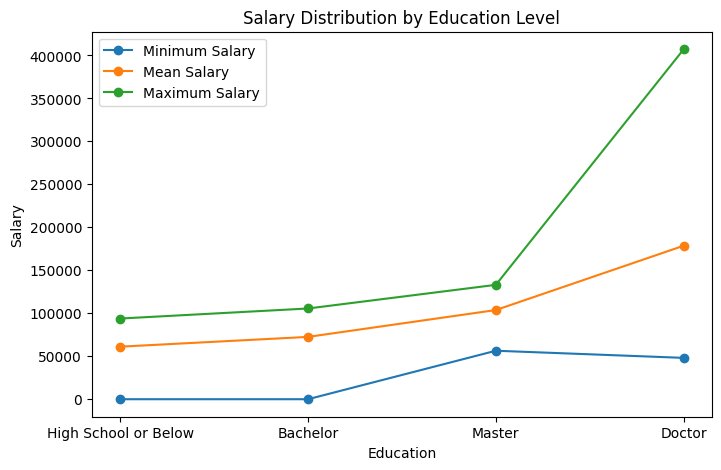

In [261]:
# Vamos a realizar una gráfica para visualizar los salarios mínimo, máximo y medio y los niveles de educación

# Configuramos el tamaño de la gráfica
plt.figure(figsize=(8,5))

# Creamos la gráfica
plt.plot(df_education_salary_stats['Education'], df_education_salary_stats['min'], marker='o', label='Minimum Salary')
plt.plot(df_education_salary_stats['Education'], df_education_salary_stats['mean'], marker='o', label='Mean Salary')
plt.plot(df_education_salary_stats['Education'], df_education_salary_stats['max'], marker='o', label='Maximum Salary')

# Añadimos los títulos de los ejes
plt.xlabel('Education')
plt.ylabel('Salary')
plt.title('Salary Distribution by Education Level')

# Añadimos la leyenda
plt.legend();

# Salvo por el caso del salario mínimo del Doctor se ve claramente que a mayor nivel de educación mayor es el nivel de sueldo.

# Como valor preliminar, vamos a imputar como salario para los clientes con nivel de educación College el valor medio entre 
# el valor medio de High School y el valor medio de Bachelor pues el valor medio de College debería de ser de ese orden. Además,
# no hay mucha diferencia entre estos 2 valores medios.

# Para hacer mejor la imputación se podrían buscar datos de sueldo por nivel de educación pues suele haber estudios de los 
# mismos y ver como se relacionan con los datos de que aquí disponemos

# Nota: de menor a mayor nivel de educación: High School, College, Bachelor, Master, Doctor


### Fase 1.3: Unión de los DataFrames

In [83]:
# La columna de unión de los DataFrames es Loyalty Number. 

# ¿Estan todos los clientes del listado de fidelización en el listado de flight activity?

# Ya comprobamos que los Loyalty Number del DataFrame de Customer eran únicos

print(f'Loyalty Customer DataFrame contains {df_loyalty_customer.shape[0]} Loyalty Numbers')

print(f'Flight Activity DataFrame contains {df_flight_activity['Loyalty Number'].unique().size}')

# Han desaparecido 4 clientes del DataFrame Flight Activity tras la limpieza del DataFrame.
# Si unimos los DataFrames teniendo en cuenta los números de fidelización de los clientes en común perderemos los datos de 4 
# clientes. A falta del objetivo del análisis, entiendo que la pérdida de estos 4 registros no perjudica en nada al análisis 
# posterior por el bajo procentaje que suponen esos 4 clientes en relación al total. Otra opción sería hacer la unión de forma
# que se conservaran esos 4 registros pero no veo que aporte nada al análisis y tendría una serie de valores nulos que tendría
# que limpiar. Por lo tanto, me  decanto por la opción de pérdida de los 4 registros de datos de los clientes.

df_loyalty_customer_activity = df_flight_activity.merge(df_loyalty_customer, on='Loyalty Number')


Loyalty Customer DataFrame contains 16737 Loyalty Numbers
Flight Activity DataFrame contains 16733


In [86]:
# Visualizamos el resultado
df_loyalty_customer.head(3)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,<NA>,<NA>
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,<NA>,<NA>
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018,1


In [87]:
# Comprobamos que el número de columnas es correcto

df_flight_activity.shape[1]+ df_loyalty_customer.shape[1] -1 == df_loyalty_customer_activity.shape[1]

True

In [88]:
# Comprobamos que el número de registros es correcto

df_flight_activity.shape[0] == df_loyalty_customer_activity.shape[0]

True

### Fase 1.4: Limpieza del DataFrame

In [ ]:
# Comprobar que los formatos son homogéneos.

# Comprobar si los registros con datos nulos salvo mes, año y número de fidelización se deben a clientes fidelizados en fechas
# posteriores a la del registro.

# Comprobacón de outliers para Total Flights. En el estudio previo un 50% de los vuelos aproximadamente tienen un valor nulo.
# el valor máximo es 32 y, en principio, se consideran outliers a partir del 20. Comprobar si hay relación entre el número total
# de vuelos y el número de años que llevan los clientes en el programa de fidelización.


## Fase 2: Visualización
1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [93]:
df_flight_activity.shape[0]

399622

In [94]:
df_flight_activity.groupby(['Year', 'Month'])['Loyalty Number'].count().reset_index(name= 'Frequency')

,Year,Month,Frequency
0,2017,1,16677
1,2017,2,16674
2,2017,3,16667
3,2017,4,16667
4,2017,5,16663
5,2017,6,16660
6,2017,7,16662
7,2017,8,16657
8,2017,9,16660
9,2017,10,16657


In [95]:
df_flight_activity.groupby(['Year', 'Month'])['Loyalty Number'].count().reset_index(name= 'Frequency')['Frequency'].sum()

# El numero de registros es correcto

399622

In [98]:
sns.histplot(x=['Month', 'Year'], data=df_flight_activity)


ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 399622 and the vector passed to `x` has length 2.

In [110]:
df_flight_activity.tail(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


## Fase 3. Evaluación de Diferencias

### 3.1 Preparación de Datos

In [106]:
df_evaluation = df_loyalty_customer_activity.loc[:,['Flights Booked', 'Education']]
df_evaluation.head()


,Flights Booked,Education
0,3,Bachelor
1,10,College
2,6,College
3,0,Bachelor
4,0,Bachelor


### 3.2 Análisis Descriptivo

In [128]:
df_evaluation.groupby('Education')['Flights Booked'].agg(['count','mean', 'std', 'median', 'min', 'max'])

# Salvo la desviación estándar y la media todos los estadísticos tienen los mismos valores
# Añadir los cuartiles que faltan

# No hay diferencias significativas entre los grupos de educación salvo por la frecuencia. Los clientes de los grupos Bachelor 
# y College realizan muchos más vuelos que el resto de niveles educativos. Hay una diferencia sustancial

,count,mean,std,median,min,max
Education,,,,,,
Bachelor,250239,4.092444,5.217470,1.0,0,21
College,101164,4.148146,5.242065,1.0,0,21
Doctor,17501,4.151363,5.251416,1.0,0,21
High School or Below,18621,4.147092,5.238512,1.0,0,21
Master,12097,4.175663,5.214462,1.0,0,21


In [121]:
df_flight_activity.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,399622.0,549596.861509,258845.783616,100018.0,326564.0,550237.5,771943.0,999986.0
Year,399622.0,2017.499652,0.500001,2017.0,2017.0,2017.0,2018.0,2018.0
Month,399622.0,6.498671,3.452124,1.0,3.0,6.0,9.0,12.0
Flights Booked,399622.0,4.114190,5.226138,0.0,0.0,1.0,8.0,21.0
Flights with Companions,399622.0,1.031144,2.076283,0.0,0.0,0.0,1.0,11.0
Total Flights,399622.0,5.145335,6.521473,0.0,0.0,1.0,10.0,32.0
Distance,399622.0,1208.175216,1433.141266,0.0,0.0,483.0,2336.0,6293.0
Points Accumulated,399622.0,123.598880,146.570846,0.0,0.0,49.0,239.0,676.5
Points Redeemed,399622.0,30.689777,125.485029,0.0,0.0,0.0,0.0,876.0
Dollar Cost Points Redeemed,399622.0,2.483920,10.149920,0.0,0.0,0.0,0.0,71.0


In [116]:
df_evaluation.groupby('Education').mean()

,Flights Booked
Education,
Bachelor,4.092444
College,4.148146
Doctor,4.151363
High School or Below,4.147092
Master,4.175663


In [117]:
df_evaluation.groupby('Education').max()

,Flights Booked
Education,
Bachelor,21
College,21
Doctor,21
High School or Below,21
Master,21


### 3.3 Prueba estadística